In [18]:
%matplotlib inline
import requests
import xlwt
import time
from datetime import datetime
from tempfile import TemporaryFile
import urllib3
import csv
from bs4 import BeautifulSoup


In [ ]:
url = 'https://www.yahoo.com/'
http = urllib3.PoolManager()
response = http.request('GET',url)
response.status


<!DOCTYPE html>
<html class="atomic my3columns l-out Pos-r https fp fp-v2 rc1 fp-default mini-uh-on viewer-right two-col ntk-wide ltr desktop Desktop bkt201" id="atomic" lang="en-US">
 <head>
  <title>
   Yahoo
  </title>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="//s.yimg.com" rel="dns-prefetch"/>
  <link href="//s.yimg.com" rel="preconnect"/>
  <link href="//search.yahoo.com" rel="dns-prefetch"/>
  <link href="//search.yahoo.com" rel="preconnect"/>
  <link href="//y.analytics.yahoo.com" rel="dns-prefetch"/>
  <link href="//y.analytics.yahoo.com" rel="preconnect"/>
  <link href="//geo.query.yahoo.com" rel="dns-prefetch"/>
  <link href="//geo.query.yahoo.com" rel="preconnect"/>
  <link href="//csc.beap.bc.yahoo.com" rel="dns-prefetch"/>
  <link href="//csc.beap.bc.yahoo.com" rel="preconnect"/>
  <link href="//geo.yahoo.com" rel="dns-prefetch"/>
  <link href="//geo.yahoo.com" rel="preconnect"/>
  <link href="//comet.yahoo.com" rel="dns-prefetch"/>
  <link h
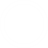
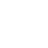

In [33]:
page = requests.get('https://www.yahoo.com/')
soup = BeautifulSoup(page.text, 'html.parser')
print(soup.prettify())


In [34]:
#Finding all the links on the page
links = soup.find_all('a')
for link in links:
    print(link.get('href'))
    

https://www.yahoo.com/
https://mail.yahoo.com/
https://www.flickr.com/
https://www.tumblr.com/
https://www.yahoo.com/entertainment/
https://www.yahoo.com/lifestyle/
https://mobile.yahoo.com/
https://view.yahoo.com/?utm_source=yahoo&utm_medium=referral&utm_campaign=topbar
https://www.yahoo.com/everything/
https://www.yahoo.com/news/politics/
https://answers.yahoo.com/
https://groups.yahoo.com/
https://www.yahoo.com/music/
https://www.yahoo.com/tech/
https://shopping.yahoo.com/
#
https://www.yahoo.com/
https://login.yahoo.com/config/login?.src=fpctx&.intl=us&.lang=en-US&.done=https%3A%2F%2Fwww.yahoo.com
https://mail.yahoo.com/
https://login.yahoo.com/config/login?.src=fpctx&.intl=us&.lang=en-US&.done=https%3A%2F%2Fwww.yahoo.com
#mega-bottombar-mail
#Main
#Aside
https://mail.yahoo.com/
https://www.yahoo.com/news/
https://finance.yahoo.com/
https://sports.yahoo.com/
https://www.yahoo.com/news/politics/
https://www.yahoo.com/entertainment/
https://www.yahoo.com/lifestyle/
https://www.yahoo.

In [35]:
#URLs and Text
for i in links:
    if i.get('href') == None:
        continue
    else:
        links_ = i.get('href')
        names = i.text
        print(links_)
        print(names)

https://www.yahoo.com/
Home
https://mail.yahoo.com/
Mail
https://www.flickr.com/
Flickr
https://www.tumblr.com/
Tumblr
https://www.yahoo.com/entertainment/
Entertainment
https://www.yahoo.com/lifestyle/
Lifestyle
https://mobile.yahoo.com/
Mobile
https://view.yahoo.com/?utm_source=yahoo&utm_medium=referral&utm_campaign=topbar
View
https://www.yahoo.com/everything/
More
https://www.yahoo.com/news/politics/
Politics
https://answers.yahoo.com/
Answers
https://groups.yahoo.com/
Groups
https://www.yahoo.com/music/
Music
https://www.yahoo.com/tech/
Tech
https://shopping.yahoo.com/
Shopping
#
Make Yahoo Your Homepage »
https://www.yahoo.com/

Yahoo

https://login.yahoo.com/config/login?.src=fpctx&.intl=us&.lang=en-US&.done=https%3A%2F%2Fwww.yahoo.com
Sign in
https://mail.yahoo.com/
Mail


https://login.yahoo.com/config/login?.src=fpctx&.intl=us&.lang=en-US&.done=https%3A%2F%2Fwww.yahoo.com
Sign in
#mega-bottombar-mail
Skip to Navigation
#Main
Skip to Main content
#Aside
Skip to Related content

In [36]:
#Function to check valid links
def validation(link):
    http = urllib3.PoolManager()
    response = http.request('GET',link)
    return response.status


In [ ]:
#Excel File With URLs Text Validation and TimeStamp
book = xlwt.Workbook()
sheet1 = book.add_sheet('sheet1')
sheet1.write(0,0,'URLs')
sheet1.write(0,1,'Text')
sheet1.write(0,2,'Validation')
sheet1.write(0,3,'Timestamp')
i=1
for j in links:
    if j.get('href') == None:
        continue
    else:
        links_ = 'https://www.yahoo.com/' + j.get('href')
        names = j.text
        sheet1.write(i,0,links_)
        sheet1.write(i,1,names) 
    valid = validation(links_)
    sheet1.write(i,2,valid)
    ts = time.time()
    q = datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    sheet1.write(i,3,q)
    i+=1


In [43]:
file = "Link.xls"
book.save(file)
book.save(TemporaryFile())
